In [51]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import integrate

In [37]:
def distr(x,s):
    return np.exp(-(x**2)/(2*(s**2)))/((s**2*2*np.pi)**0.5)
def beta(x,a,b):
    return x**(a-1)*(1-x)**(b-1)

In [39]:
x0 =0.5
xs = [x0]
N=1000000
# s=0.1
a=2
b=5

In [41]:
for i in range(N):
    xi = np.random.uniform()
    F = beta(xi,a,b)/beta(xs[i],a,b)
    if F>=1:
        xs.append(xi)
    else:
        if np.random.uniform()<F:
            xs.append(xi)
        else:
            xs.append(xs[-1])

In [53]:
xt = np.linspace(0,1,1000)
yt = beta(xt,a,b)
yt/=(integrate.simps(yt,xt))

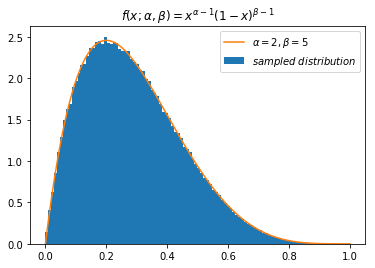

In [66]:
histo = plt.hist(xs,bins=100,density=True,label = r"$sampled\ distribution$")

plt.plot(xt,yt,label = r"$\alpha = 2, \beta = 5$")
plt.title(r"$f(x;\alpha,\beta)=x^{\alpha-1}(1-x)^{\beta-1}$")
plt.legend()
plt.savefig("beta.pdf")

In [68]:
def invExp(x,lamb):
    return np.exp(-lamb/x)/x**2

In [85]:
lamb = 1
d=0.5
x0 =0.5
xs = [x0]
N=1000000

In [86]:
for i in range(N):
    xi = xs[-1] + d*2*(np.random.random()-0.5)
    while(xi<=0):
        xi = xs[-1] + d*2*(np.random.random()-0.5)
    F = invExp(xi,lamb)/invExp(xs[i],lamb)
    if F>=1:
        xs.append(xi)
    else:
        if np.random.uniform()<F:
            xs.append(xi)
        else:
            xs.append(xs[-1])

In [87]:
xt = np.linspace(0.00001,300,1000)
yt = invExp(xt,lamb)
yt/=(integrate.simps(yt,xt))

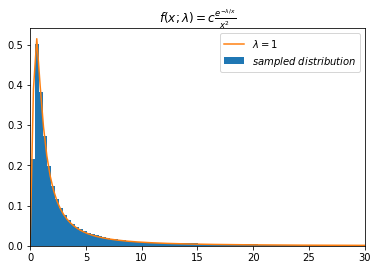

In [93]:
histo = plt.hist(xs,bins=200,density=True,label = r"$sampled\ distribution$")

plt.plot(xt,yt,label = r"$\lambda = 1$")
plt.title(r"$f(x;\lambda)=c \frac{e^{-\lambda/x}}{x^2}$")
plt.legend()
plt.xlim(0,30)
plt.savefig("invExp.pdf")